# Experimento 2

Modificação do Experimento 1 para induzir interferência mútua entre os dois primeiros nós próximos ao sink, de modo que o nó 2 interfira no nó 6 e vice-versa.

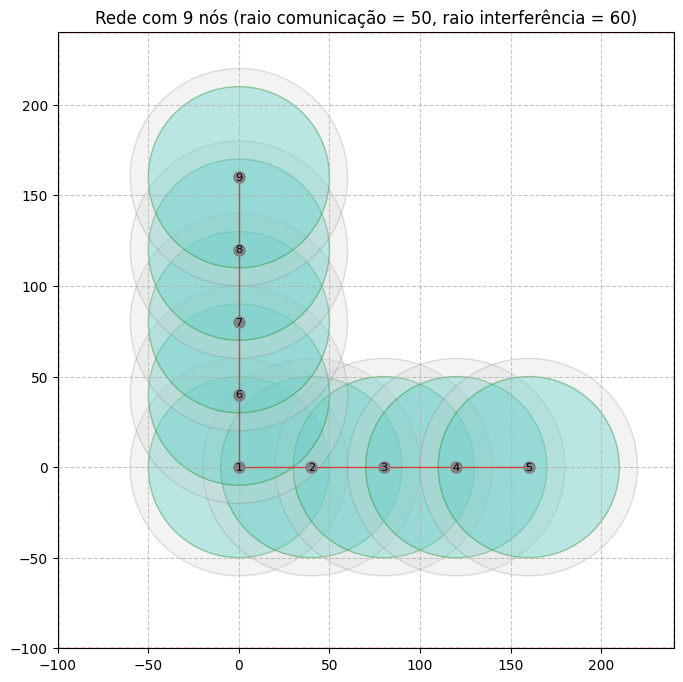


=== MÉDIAS POR MOTE ===
           node  rtt_latency  r2n_latency  n2r_latency   rssi  radio_rx_energy_mj  radio_tx_energy_mj  cpu_energy_mj  throughput1  throughput2
fd00::202:2:2:2       881.17        85.68       389.89 -77.77                7.98                0.12          18.00         0.02         0.02
fd00::203:3:3:3      1435.18       911.22       834.44 -77.77               10.33                0.07          18.32         0.10         0.10
fd00::204:4:4:4      1775.50      1806.64      1013.18 -77.76               16.18                0.00          19.87         0.22         0.22
fd00::205:5:5:5      2119.92      2818.68      1024.82 -77.75               19.22                0.00          19.98         0.33         0.33
fd00::206:6:6:6       760.89       374.34       323.59 -77.76               10.78                0.14          19.37         0.05         0.18
fd00::207:7:7:7      1204.58       991.20       732.97 -77.77               13.00                0.08          18.51 

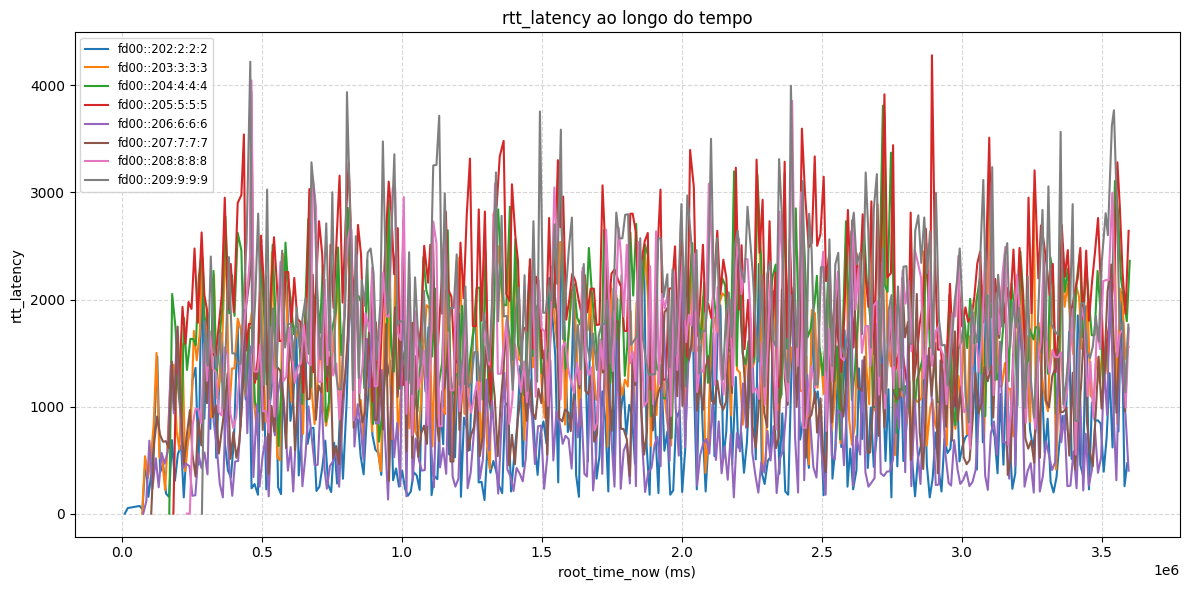

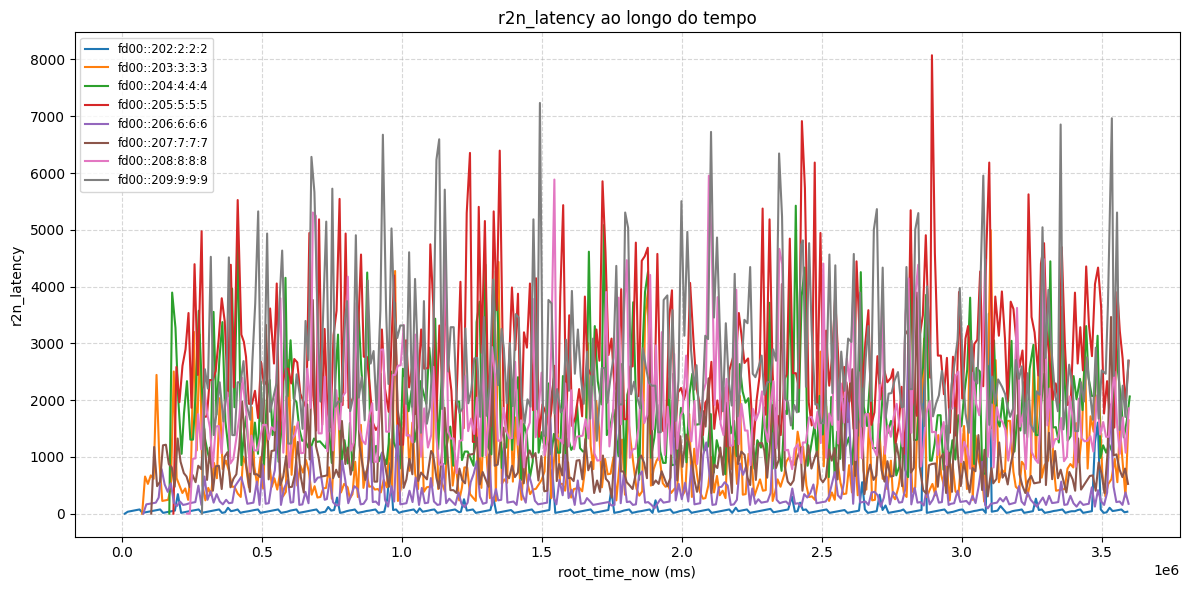

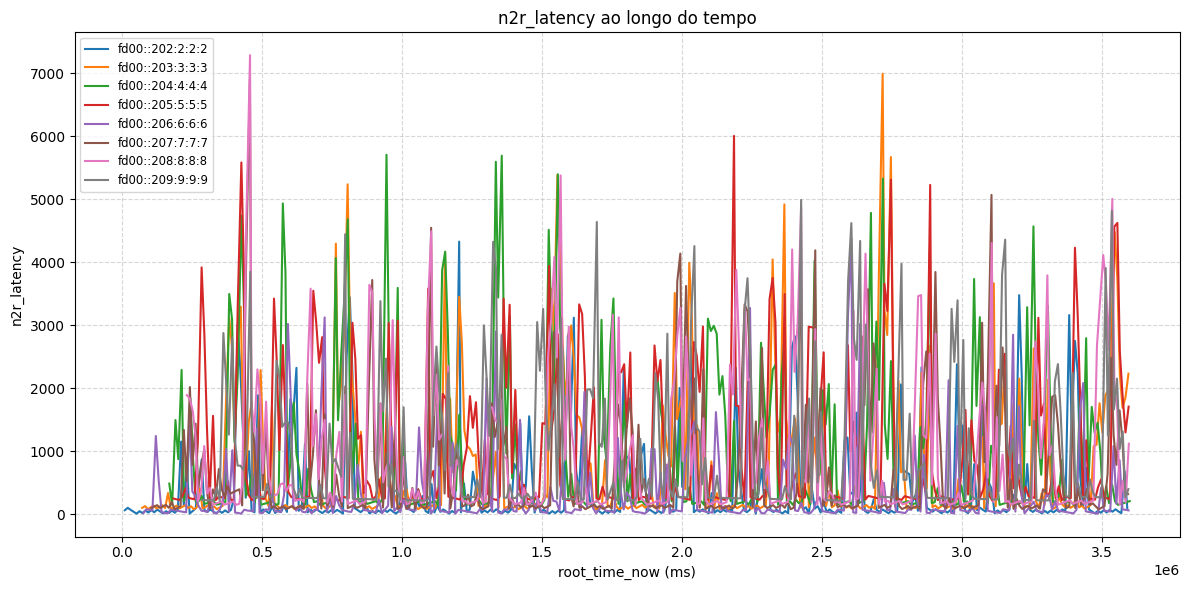

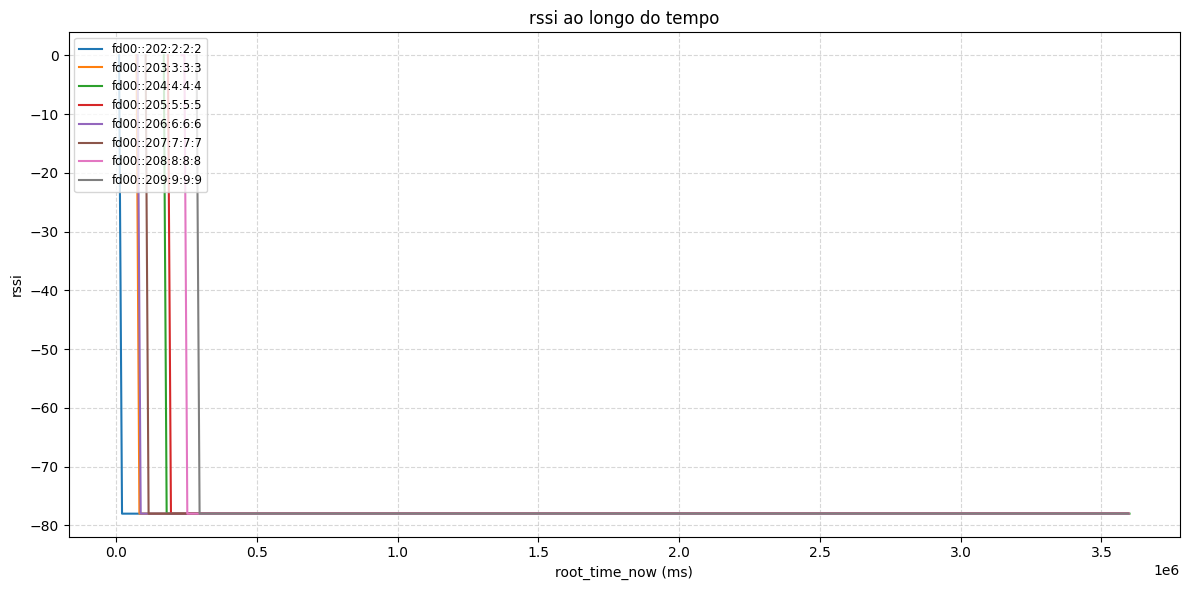

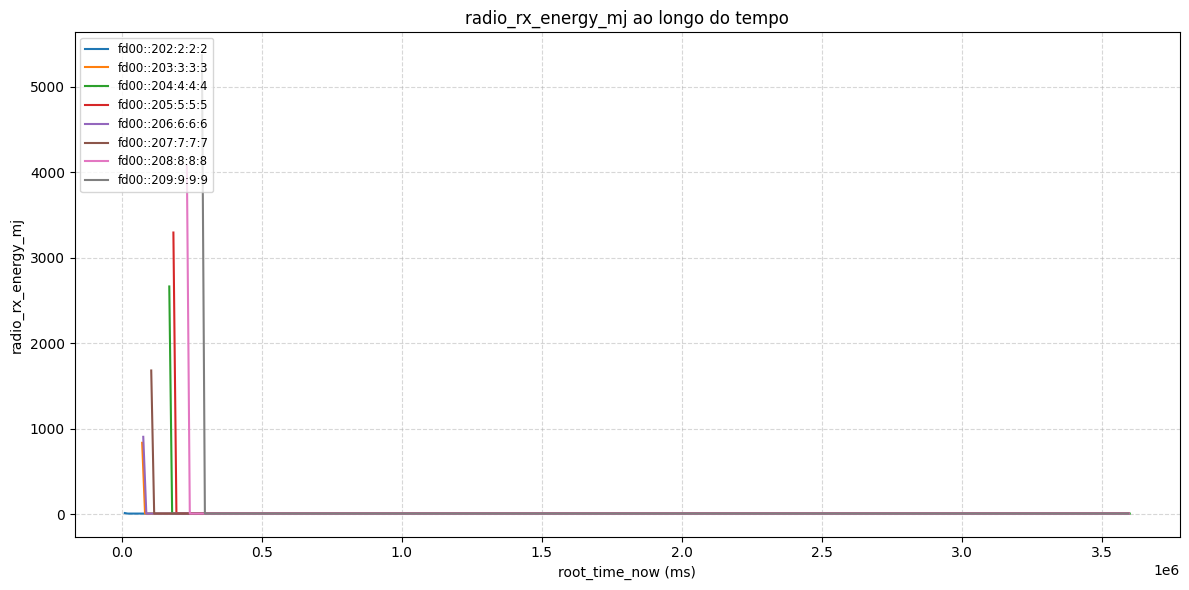

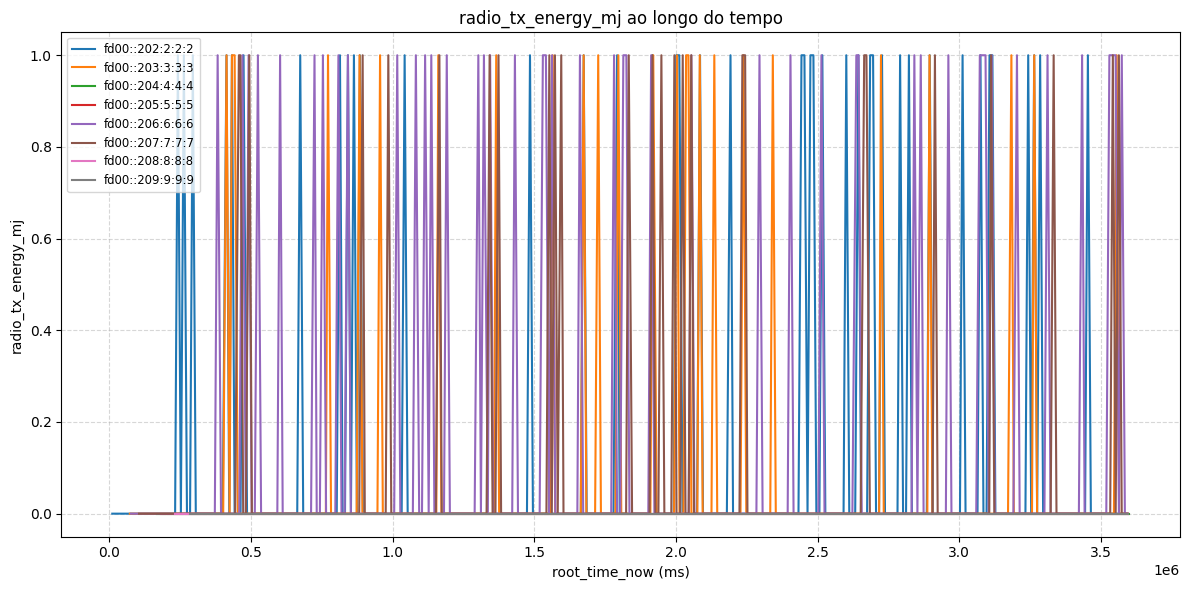

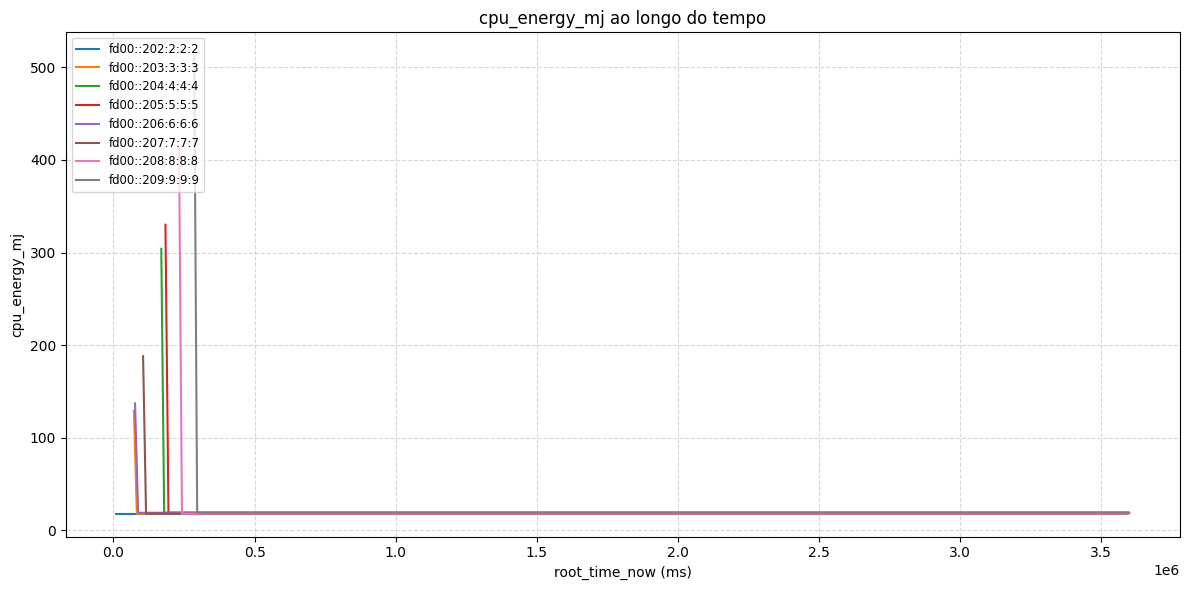

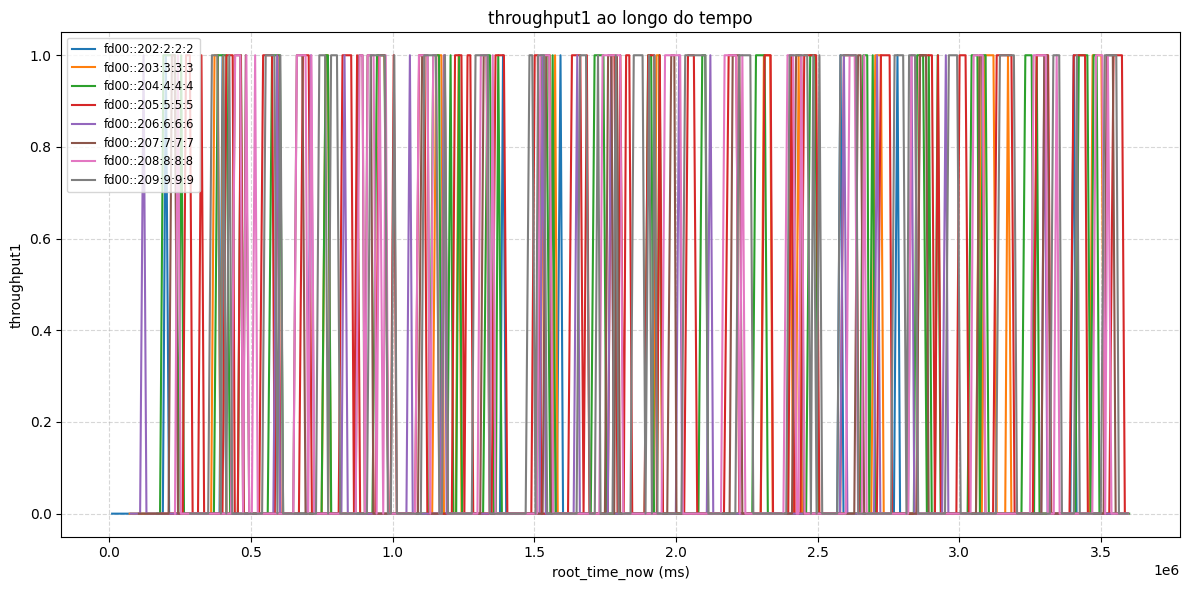

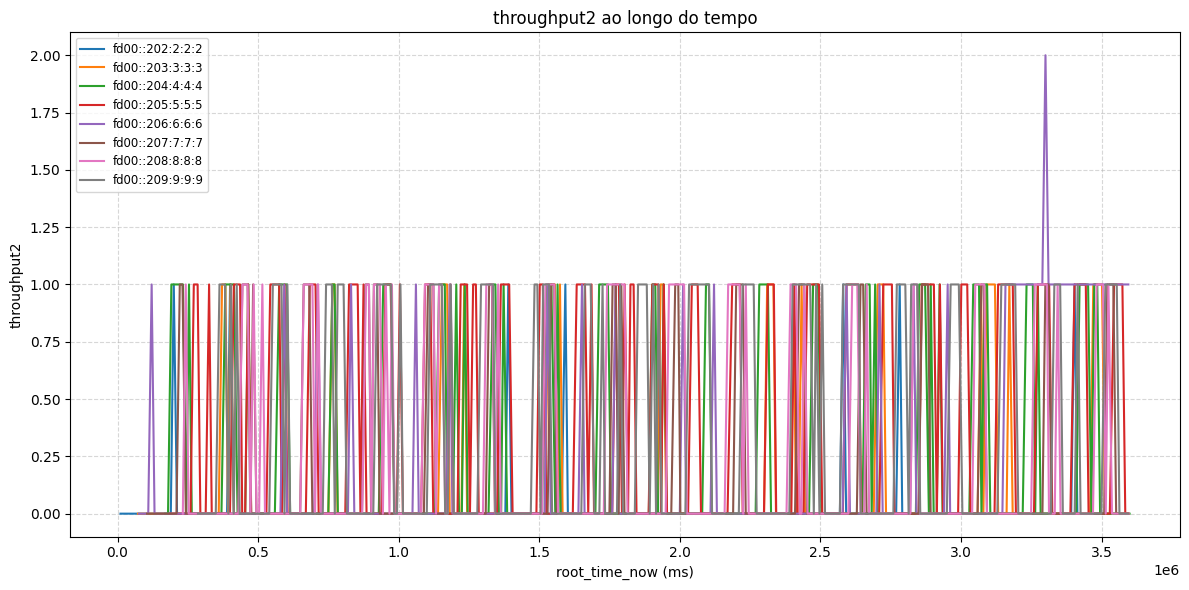

In [2]:
import sys, os

project_path = os.path.abspath(os.path.join(os.getcwd(), "../../../../.."))  # Ajuste conforme a localização do notebook
if project_path not in sys.path:
    sys.path.insert(0, project_path)
    
from pylib import visual
from pylib import data_analysis

exp = visual.plot_network_from_json("../../../../model/static/ex2.json")

import matplotlib.pyplot as plt
from pathlib import Path

# -------------------------- Configurações ----------------------------------
log_path = Path("./cooja.log")          # arquivo de log de entrada
csv_full  = Path("cooja_metrics.csv")   # métricas individuais
csv_means = Path("cooja_means.csv")     # médias por mote

# -------------------------- DataFrame bruto --------------------------------
df = data_analysis.convert_log_to_csv(log_path, csv_full)

# ------------------------- Médias por mote ---------------------------------
metrics_cols = [
    "rtt_latency",
    "r2n_latency",
    "n2r_latency",
    "rssi",
    "radio_rx_energy_mj",
    "radio_tx_energy_mj",
    "cpu_energy_mj",
    "throughput1",
    "throughput2",
]

means = (
    df.groupby("node")[metrics_cols]
      .mean()
      .round(2)            # duas casas decimais para facilitar leitura
      .reset_index()
)

means.to_csv(csv_means, index=False)
print("\n=== MÉDIAS POR MOTE ===")
print(means.to_string(index=False))
# --------------------------- Plots -----------------------------------------
unique_nodes = df["node"].unique()

for metric in metrics_cols:
    plt.figure(figsize=(12, 6))
    for node in unique_nodes:
        node_df = df[df["node"] == node]
        plt.plot(
            node_df["root_time_now"],
            node_df[metric],
            label=f"{node}",
        )
    plt.title(f"{metric} ao longo do tempo")
    plt.xlabel("root_time_now (ms)")
    plt.ylabel(metric)
    plt.legend(loc="upper left", fontsize="small")
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.tight_layout()
    plt.show()